# **Laboratorio 3: Librerías numéricas y de gráficos, arreglos y matrices y formas cuadráticas**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez Quiroga
**Número del grupo**

Grupo 2

Este laboratorio consta de dos partes, la primera asociada al uso de las librerias numéricas y de gráficos (Numpy y Matplotlib), con aplicaciones como las opreaciones con arreglos y matrices y el cálculo de normas de un vector. Luego, está la parte sobre formas cuadráticas, donde se incluyen ahora gráficos tridimensionales, cálculo de valores y vectores propios einterpretaciones geométricas. Se recomienda leer la siguiente información:

https://numpy.org/doc/stable/user/basics.html

https://matplotlib.org/stable/plot_types/index.html

# **Módulos y librerías**

En el siguiente laboratorio se busca recordar algunas funciones de *Numpy* para realizar diferentes operaciones matemáticas con arreglos, también se busca implementar diferentes tipos de gráficas usando la librería *Matplotlib*. Se explica cómo hacer un plot básico, subplots, barras e histogramas.

Importe las librerías Numpy y Matplotlib

In [7]:
import matplotlib.pyplot as plt
import numpy as np

1.	Escriba una función que multiplique todos los números de un arreglo. Luego pruebela con ejemplo.

In [8]:
def multiply_array(numero:list)->float:
    m = 1
    for n in numero:
        m = m*n
    return m 

x = [1,2,3,4,5]
print(multiply_array(x))

120


2. Escriba una función que calcule el factorial de un número entero positivo. Luego pruebela con ejemplo.


In [9]:
def factorial_v1(n: int):
    if n > 0 and isinstance(n, int):
        f = 1
        while n > 0:
            f *= n
            n -= 1
        return f
    else:
        return f"{n} no es un entero positivo"
 
   
def factorial_v2(n: int, fact=1):
    if n > 0:
        return factorial_v2(n-1, fact*n)
    elif n < 0:
        return f"{n} no es un entero positivo"
    else:
        return fact


print(factorial_v1(12))
print(factorial_v2(12))

479001600
479001600


3. Escriba una función que indique si un número entero positivo pertenece a la serie de Fibonacci. Luego pruebela con ejemplo.

In [10]:
def is_fibonacci(n, n0=0, n1=1):
    if n == n0:
        return True
    elif n < n0:
        return False
    else:
        return is_fibonacci(n,  n1, n1 + n0 )
    
print(is_fibonacci(33))
print(is_fibonacci(34))

False
True


4. Usando las funciones de las librerías numpy y matplotlib para Python obtenga 1000 valores aleatorios con distribución uniforme y 1000 valores con una distribución normal. Súmelos y grafique el correspondiente histograma para 10, 20, 30 y 50 particiones (bins). (Utilice subplots). *Pista: Para generar los valores use el módulo random de la librería numpy.*

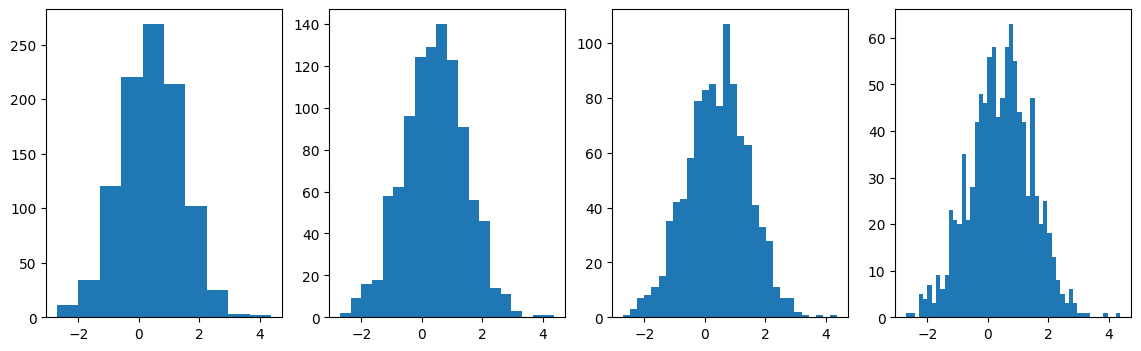

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def hist_random_ints():
    bins = [10, 20, 30, 50]
    rand_uniform = np.random.uniform(size=1000)
    rand_normal = np.random.normal(size=1000)
    values = np.add(rand_uniform, rand_normal)

    plt.figure(figsize=(14, 4))
    for i in range(len(bins)):
        plt.subplot(1, 4, i+1)
        plt.hist(values, bins[i])
    plt.plot()
    
hist_random_ints()

5. Para un sistema masa-resorte que describe un Movimiento Armónico Simple (m.a.s) como el de la siguiente figura:

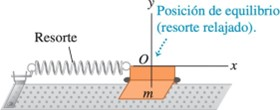


Zemansky, S. (2013). Movimiento Periódico. In Pearson (Ed.), Física Universitaria (12th 
ed., pp. 65–71). Pearson. https://doi.org/10.1057/9781137311955_5

Grafique el desplazamiento, velocidad y aceleración bajo los parámetros: 

T = 4s (periodo) 
t = 8s (duración) 
A = 5m (amplitud) 

Recuerde que el desplazamiento está dado por la ecuación:

𝑥 = 𝐴  𝑐𝑜𝑠(ω𝑡 + ϕ)

Donde x es el desplazamiento en una dimensión, ω es la velocidad angular (rad/seg) y ϕ es la fase inicial. 

*Pista: Cree un vector de tiempo que vaya desde 0 hasta el tiempo final(t).*

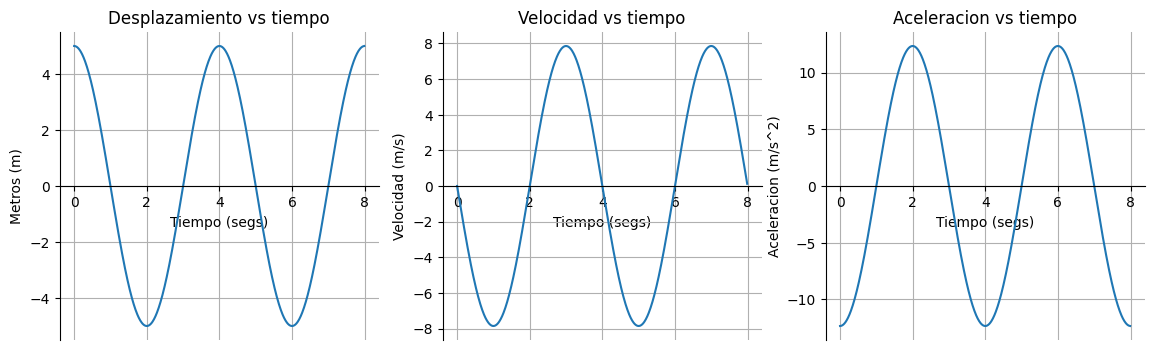

In [12]:
def graph_MAS(periodo, duracion, amplitud):
    
    # DESPLAZAMIENTO
    w = ((2*np.pi)/periodo)
    x = np.arange(0, duracion, 0.01)
    #Desplazamiento
    y = amplitud*np.cos(w*x)
    #Velocidad
    v = -amplitud*w*np.sin(w*x)
    #Aceleración
    a = -amplitud*(w**2)*np.cos(w*x)
    
    graficas = [[y, "Desplazamiento vs tiempo", "Metros (m)"], [v, "Velocidad vs tiempo", "Velocidad (m/s)"], [a, "Aceleracion vs tiempo", "Aceleracion (m/s^2)"]]    
    plt.figure(figsize=(14, 4))
    
    for i in range(len(graficas)):
        ax = plt.subplot(1, 3, i+1)
        plt.title(graficas[i][1])
        plt.xlabel("Tiempo (segs)")
        plt.ylabel(graficas[i][2])
        plt.grid()
        
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        plt.plot(x, graficas[i][0])
    
graph_MAS(4, 8, 5)
    

6. Sean A, B y C las siguientes matrices:



\begin{align}
A = \begin{pmatrix}
0.1 & 2 \\
2 & 0.1
\end{pmatrix}
\\
B = \begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 4
\end{pmatrix}
\\
C = \begin{pmatrix}
5/3 & 2/3 \\
2/3 & 5/3
\end{pmatrix}
\end{align} 
>Realice las siguientes operaciones matriciales, donde $∗$ es el producto punto entre dos matrices.


\begin{align}
1. \ A * B\\
2. \ A^2 ∗ B\\
3. \ C^3 * B\\
\end{align} 





In [13]:
a =[[0.1, 2],[2,0.1]]
b = [[1,2,3],[4,5,4]]
c = [[5/3,2/3],[2/3,5/3]]

A = np.array(a)
B = np.array(b)
C = np.array(c)

x1 = A.dot(B)
x2 = (A**2).dot(B)
x3 = (C**3).dot(B)



7. a. Cree una función que tenga como entrada un vector real cualquiera 2x1 y el parámetro $L$. La función debe debe asignar las entradas del vector como coeficientes de las variables $x_1$ y $x_2$ de la siguiente forma:\\

Sea el vector $V = [a,b]^T$, luego, se debe crear el vector $X = [ax_1, bx_2]^T$

Luego, calcular la norma $L$ del vector, es decir, si $L=1$, calcula la norma $L1$, mientras que si $L=2$, calcula la $L2$. Además, debe graficar la una curva de nivel con valor arbitrario $c$ de la función que se genera con la norma.

In [14]:
def graficar_norma(norma):
    
    pass
    #print(vectors)
    
def norma_vector(vector, L):
    
    norma = None
    
    if L == 1:
        norma = 0
        for i in vector:
            norma += abs(i)
        graficar_norma(norma)
            
    elif L == 2:
        norma = 0
        for i in vector:
            norma += i**2
        norma = (norma)**(1/2)
        graficar_norma(norma)
        
    return norma

print(norma_vector([-1,-2,3,4,5], 1))
print(norma_vector([-1,-2,3,4,5], 2))

NameError: name 'vectors' is not defined

b. Use su función anterior para calcular y graficar la norma tanto $L1$ como $L2$ del vector $[5,2]$.

In [ ]:
print(norma_vector([5,2], 1))
print(norma_vector([5,2], 2))

# **Curvas de nivel, superficies, valores y vectores propios en formas cuadráticas**

La optimización es una rama de las matemáticas que busca determinar de forma tanto cuantitativa como cualitativa la mejor manera de solucionar un problema. Cuando se optimiza de forma cuantitativa, el deseo es determinar máximos o mínimos de una función escalar de una o más variables bajo ciertas restricciones. Dicha función puede tomar cualquier forma siempre y cuando cumpla con algunas características como de diferenciación, continuidad, entre otras, sin embargo, una de las formas más trabajadas en el área de la inteligencia artificial es la forma cuadrática. Esta forma se plantea de la siguiente manera:

\begin{align*}
f(X)=\frac{1}{2}X^TQX + B^TX+C
\end{align*}

Donde $Q$ es una matriz constante, $B$ un vector constante y $C$ una constante y $X$ es el vector de las variables. Notar que la función $f:\mathbb{R^n}\rightarrow\mathbb{R}$, sin embargo, para poder graficar, se va a trabajar solamente con $f:\mathbb{R^2}\rightarrow\mathbb{R}$. Los algoritmos de optimización tradicionales funcionan bien si la matriz $Q$ cumple ciertas restricciones, por lo que, primemero se trabajará con esta. La idea de esta parte es crear una función que cumpla ciertas característas para al final aplicarla con algunos ejemplos..


1. Genere una función que reciba como entrada una matriz cualquiera $Q$ e imprima un arreglo con lso coeficientes se la siguiente forma cuadrática:

  \begin{align*}
   a_1x_1^2 + a_2x_2^2 + a_3x_1x_2 
  \end{align*}

2. Agregue la función que permita obtener la forma simétrica de la matriz $Q$, llamada $Q_s$ en caso de que no lo sea, si es simétrica, indicar que ya es simétrica.

3. Adicionar la función que permita decir si la matriz $Q$ es positiva definida, negativa definida, positiva semidefinida, negativa semidefinida, o ninguna de las anteriores.

4. Ahora, el algoritmo debe encontrar la matriz $Λ$, que es la matriz diagonal de valores propios, la matriz $V$ que es de los vectores propios normnalizados asociados a $Q_s$

5. Recordando la teoría de álgebra lineal se sabe que $Q_s=VΛV^T$. Haga que el algoritmo reemplace esta expresión en laforma cuadrática y haga el cambio de variable $V^TX = Y$, para definir la forma cuadrática como $f(Y) = Y^TΛY$.

6. El objetivo de lo anterior es darle una interpretación gráfica a la forma cuadrática. Para esto, el agoritmo debe graficar una curva de nivel con un valor cualquiera $c$ para la forma cuadrática con variables $X$ $(f(X) = X^TQX)$ y con variables $Y$ $(f(Y) = Y^T\Lambda Y)$. Grafique también los vectores propios y los vértices y covértices de la elipse que se genera con rectas en ambas gráficas **(excepto en el caso de que $Q$ sea indefinida o semidefinida)**. También el algoritmo debe indicar los valores numéricos de estos vértices y covértices.

7. Adicionalmente, debe graficar una superficie para cada caso, es decir, tanto para $f(X)$ como para $f(Y)$, donde se resalten cinco curvas de nivel. Además, si la $f$ es convexa (Q positiva semidefinida o definida), grafique también el punto mínimo.

**Ayuda:** Notar que al hacer el cambio variable se llega a la siguiente forma cuadrática:
  \begin{align*}
    f(Y) = λ_1y_1^2 + λ_2y_2^2
  \end{align*}

Luego, si definen una curva de contorno con valor $c$, y hacer alguna de las dos variables cero, por ejemplo $y_2$, se obtiene:


  \begin{align*}
    c = λ_1y_1^2 → y_1^* = \sqrt\frac{c}{λ_1}
  \end{align*}

  Ese sería uno de los vértices de la elipse. Ahora, si desea encontrar kos vértices punto pero con variable $X$:

  \begin{align*}
    X^* = VY^*
  \end{align*}




In [ ]:
# Revisar si la matriz es simetrica
def es_simetrica(q: np.array)->bool:
    a = np.transpose(q)
    if np.array_equal(a,q) == True:
        return True
    else:
        return False

9. Pruebe su función creada con los siguientes ejemplos:

\begin{align*}
  Q_1 = \begin{pmatrix}
3 & 2 \\
1 & 2
\end{pmatrix}\\
 Q_2 = \begin{pmatrix}
-3 & 1 \\
-2 & -1
\end{pmatrix}\\
 Q_3 = \begin{pmatrix}
0 & 2 \\
1 & 0
\end{pmatrix}\\
\end{align*}